<a href="https://colab.research.google.com/github/stanislawWojtas/Przetwarzanie-Obraz-w-Cyfrowych/blob/main/02_point_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [29]:
import cv2
import os
import requests
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Text(0.5, 1.0, 'Banknot 100zł - Oryginalny')

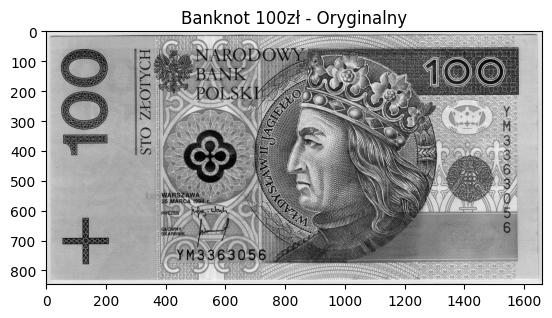

In [30]:
img = cv2.imread("100zloty.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.title("Banknot 100zł - Oryginalny")

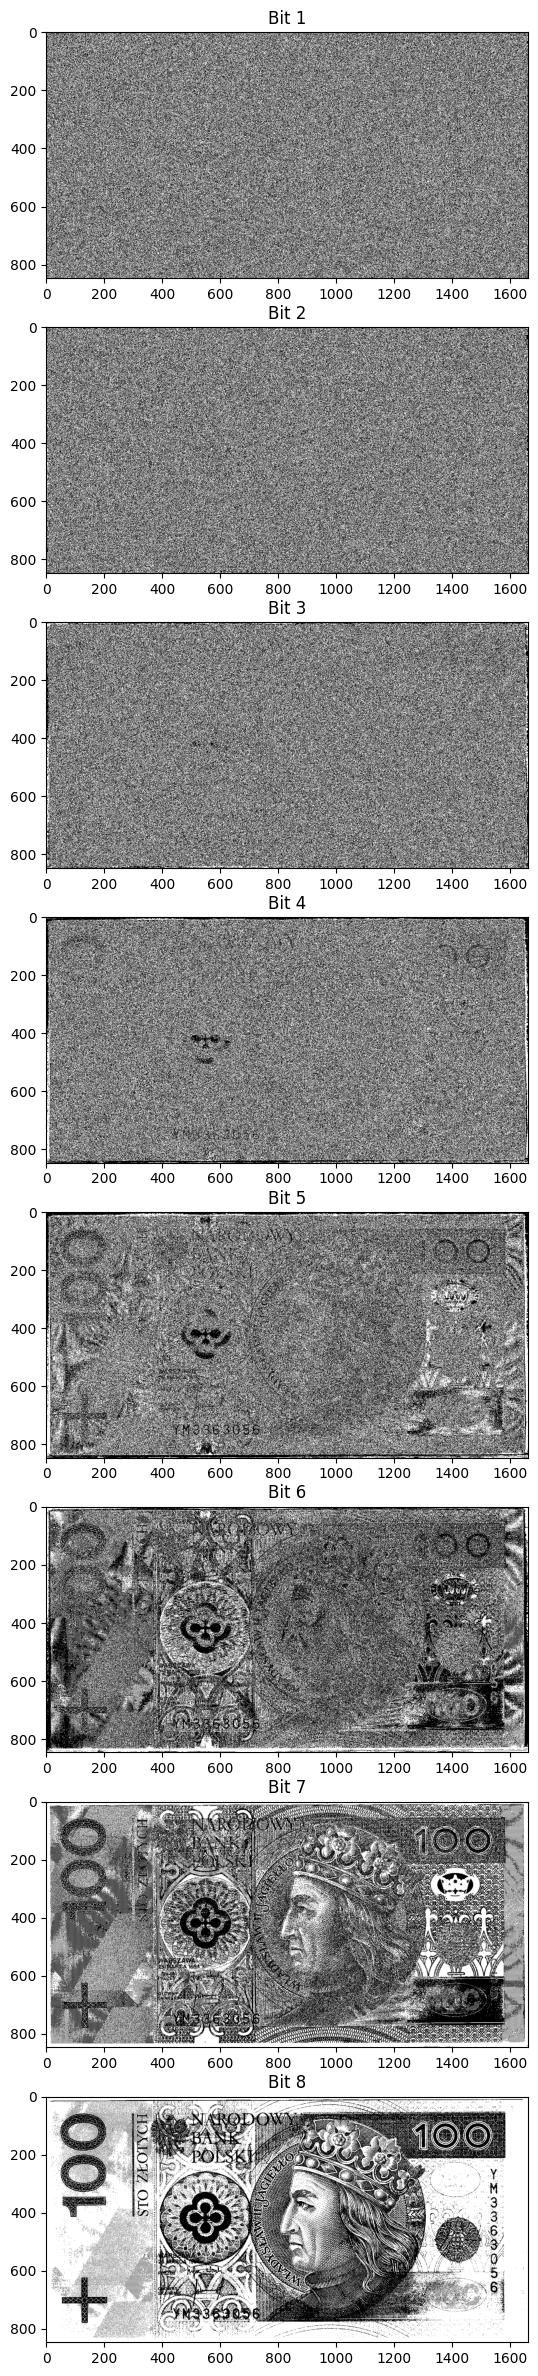

In [31]:
import matplotlib.pyplot as plt

bit_move = [0, 1, 2, 3, 4, 5, 6, 7]
bit_images = []

fig, ax = plt.subplots(8, 1, figsize=(10, 30))

for i in bit_move:
    bit_img = (img >> i) & 1
    bit_images.append(bit_img)
    ax[i].imshow(bit_img, cmap="gray")
    ax[i].set_title(f"Bit {1+i}")

plt.show()

Text(0.5, 1.0, 'Obraz zrekonstruowany z dwóch najważniejszych bitów')

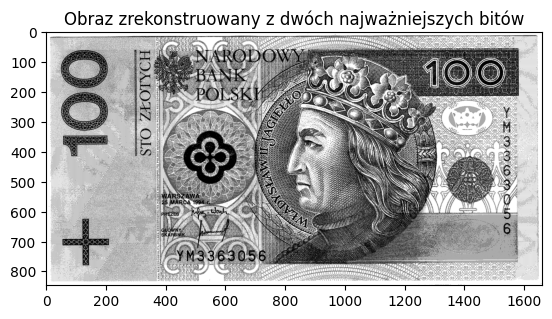

In [32]:
# Odtworzenie obrazu z 2 najbardziej znaczących bitów
img_2_bits = bit_images[7] * 128 +  bit_images[6] * 64
plt.imshow(img_2_bits, cmap='gray')
plt.title("Obraz zrekonstruowany z dwóch najważniejszych bitów")

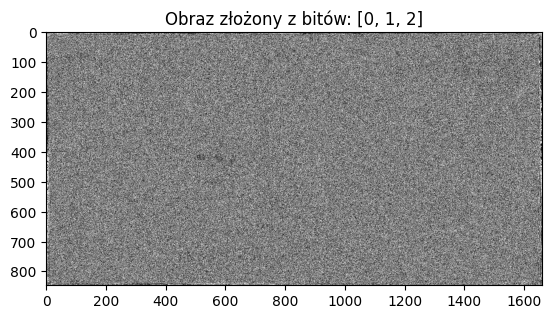

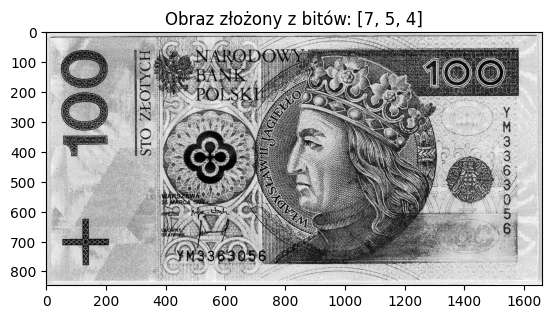

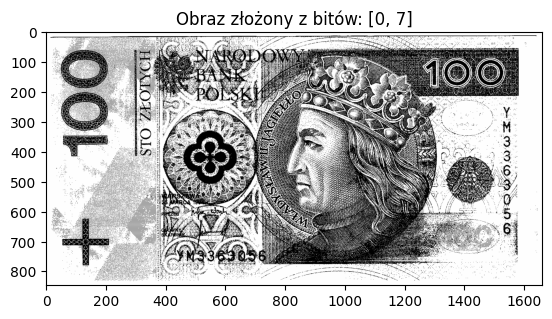

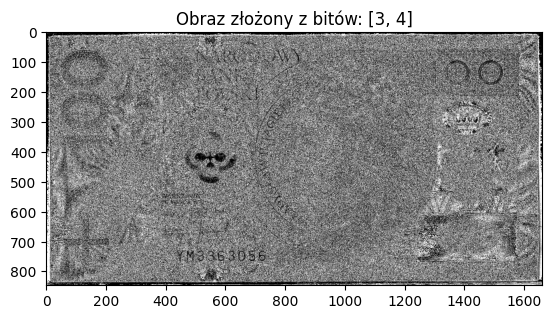

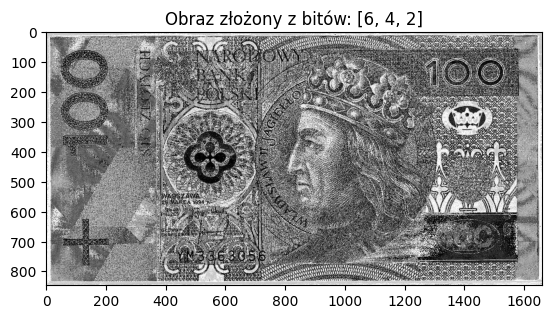

In [33]:
# funkcja która wyświetla obraz składający się z poszczególnych bitów (numerowane 7 6 5 4 3 2 1 0)
def plot_bits(bit_images, bits):
  image = 0
  for bit in bits:
    image += 2**bit * bit_images[bit]
  plt.imshow(image, cmap='gray')
  plt.title(f"Obraz złożony z bitów: {bits}")
  plt.show()

plot_bits(bit_images, [0, 1, 2])
plot_bits(bit_images, [7, 5, 4])
plot_bits(bit_images, [0, 7])
plot_bits(bit_images, [3, 4])
plot_bits(bit_images, [6, 4, 2])